In [1]:
import cairo
import numpy as np
import matplotlib.colors as mplc

[0.5, 0.75, 1.0]


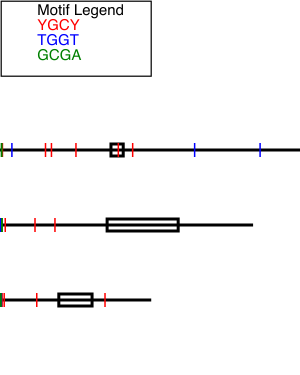

In [79]:
class draw_svg():
    '''draw class for motif mark svg creation'''
    def __init__(self, motifs, lengths, exons):
        self.motifs = motifs
        self.lengths = lengths
        self.exons = exons
    
    
    def setup_surface(self):
        '''draws a surface for the number of fasta entries'''
        
        # dimensions
        n = len(self.exons)
        self.width = 100 * n
        self.height = (100 * n) + 25 * n 
        self.svg_len = max(self.lengths) 
        
        # surface 
        self.surface = cairo.SVGSurface('example.svg', 300, self.height)
        self.context = cairo.Context(self.surface)
        self.context.scale(300, 300)

        # centers
        self.centers = []
        top = 1
        self.centers.append(top/(n+1) + 0.25)
        
        # create the right number of centers for sequences
        while top < n:
            top += 1
            self.centers.append(top/(n+1) + 0.25)
            
        print(self.centers)
    
    
    def draw_seq_regions(self):
        '''draws the sequences as black lines at appropriate centers'''
        # sequence lines across figure
        for l,c in zip(self.lengths, self.centers):
            x, x2 = 0, l/self.svg_len
            y, y2 = c, c
            self.context.move_to(x, y)
            self.context.set_line_width(0.01)
            self.context.line_to(x2, y2)
            
        self.context.stroke()

    def draw_exons(self):
        '''draws exon from a string of coordinates "start:stop"'''
        
        # iterate the centers, lengths, and exons
        for seqlen, ecenter, exon in zip(self.lengths, self.centers, self.exons):
            
            # set exon color as black with mpl function
            r,g,b,a = mplc.to_rgba('black')
            self.context.set_source_rgba(r,g,b,a)
            
            # draw rectangle    
            self.context.rectangle(exon[0]/self.svg_len, (ecenter-0.02), (exon[1]-exon[0])/self.svg_len, 0.04)
        
        # draw the exons
        self.context.stroke()
        
    def draw_motifs(self, colors):
        '''draws motifs of the desired color on the sequence region'''
        
        for mot, center in zip(self.motifs, self.centers):
            
            
#             print(mot)
            
            # for each attribute of each seq region
            for m, seqlen, col in zip(mot, self.lengths, colors):
                    
#                 print([m, col])
                
                # use mpl color function to get the color you want
                r,g,b,a = mplc.to_rgba(col)
    
                # set that color as the context
                self.context.set_source_rgba(r, g, b, a)

                    
                for pos in m:
                    
                    motif = int(pos)
                    
                    
                    # scale to svg_len 
                    x = motif/self.svg_len

                    # draw around center line
                    y = center + 20/self.svg_len
                    y1 = center - 20/self.svg_len

                    # create line
                    self.context.move_to(x,y)
                    self.context.line_to(x,y1)

                    self.context.set_line_width(0.005)

                    self.context.stroke()
                    
    def draw_legend(self):
        self.context.set_source_rgba(0, 0, 0, 1)
        self.context.set_line_width(0.004)
        self.context.rectangle(0.004, 0.004, 0.5, 0.25)

        self.context.select_font_face("Sans", cairo.FONT_SLANT_NORMAL,
                            cairo.FONT_WEIGHT_BOLD)
        self.context.set_font_size(0.05)
        
        # x, y coordinate of text 
        x = (0.5 - 0.004)/4 
        y = 0.05
        self.context.move_to(x , y)
        self.context.show_text("Motif Legend")
        self.context.stroke()
        
        for i, mtext in enumerate(['YGCY', 'TGGT', 'GCGA']):
            r, b, g, a = mplc.to_rgba(colors[i])
            self.context.set_source_rgba(r, b, g, a)
            
            self.context.move_to(x, 0.10 + 0.05*i)
            self.context.show_text(mtext)
            self.context.stroke()

    def finish_svg(self, colors):
        # start svg
        svg = draw_svg(motifs, lengths, exons)

        # setup svg surface
        svg.setup_surface()

        # draw the scaled regions for each entry
        svg.draw_seq_regions()

        # draw exons
        svg.draw_exons()
        
        svg.draw_motifs(colors)

        svg.draw_motifs
        
        svg.draw_legend()

        # finish the surface!
        #return 
        svg.surface.finish() 

motifs  = [[('7', '130', '147', '217', '338', '379'), ('34', '556', '743'), ('54')],
          [('4', '15', '100', '157'), ('42'),('56')],
          [('6', '12', '105', '300'), ('34'),('300')]]
lengths = (857, 723, 432)
exons = ((317, 352), (306, 509), (168, 263))

colors = ('r', 'b', 'g')

svg = draw_svg(motifs, lengths, exons)
svg.finish_svg(colors)


from IPython.display import SVG, display
SVG('examp.svg')

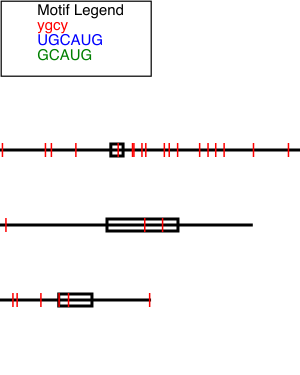

In [86]:
from IPython.display import SVG, display
SVG('motifs.svg')


In [4]:
## Object oriented play time, let's implement this for motif_mark

class to_do:
    '''To do list'''
    def __init__(self, store, my_list):
        self.store = 'TJS'
        self.list = my_list
        
    def add_item_to_list(self,item):
        self.list.append(item)

my_list = ['apples', 'cookies', 'milk']

td = to_do('TJS', my_list)

print(td.list)

td.add_item_to_list('milk')

print(td.list)


['apples', 'cookies', 'milk']
['apples', 'cookies', 'milk', 'milk']


In [5]:
st = "asdfa;lsdf;lkajs;dlfjkhlkjCGCChsdfoiuwerASygcyDFBBTGCATGCBTugcuTGGTGAGGTTAAAGTGCTGTGCGTasdfhlkwerltgcatgasdflksdf"

In [6]:
# def find_exon(string):
#     coordinates = []
#     for i, char in enumerate(st):
#         if char.isupper():
#             coordinates.append(i)
#     return (min(coordinates),max(coordinates))

# find_exon(st)

# motif list
motif_list
def motif_patterns(motif_list):
    'returns list of regex searchs for any motif of IUPAC nucleotide codes'
    motif_match_list = []
    
    IUPAC_dict = {'y':'(C|T|U)',
                  'r':'(A|G)',
                  's':'(C|G)',
                  'w':'(A|T|U)',
                  'k':'(G|T|U)',
                  'm':'(C|A)',
                  'b':'(C|G|T|U)',
                  'd':'(A|G|T|U)',
                  'v':'(A|C|G)',
                  'h':'(A|C|T|U)'
                 }
    
    for tif in motif_list:
        for key in IUPAC_dict:
            m = re.finditer(r'(?i)'+key, tif)
            for i in m:
                tif = tif.replace(i.group(), IUPAC_dict[key])
    
        motif_match_list.append(tif)
        
    return motif_match_list
        

motif_patterns(motif_list)

           

import re

def motif_coords(motif):
    'returns string coordinates of motif match (case insensitive)'
    motif_coords_list = []
    m = re.finditer(r'(?i)'+motif, st)
    for i in m:
        motif_coords_list.append(str(i.start())+':'+str(i.end()))
        
    return motif_coords_list

motif_coords('(C|T|U)gc(C|T|U)')

NameError: name 'motif_list' is not defined

In [ ]:
def get_motif_list(motifile):
    '''return list of motifs from motif file'''
    with open(motifile, 'r') as mh:

        # list to hold motifs of interest
        motifs = []

        # loop over each line storing each motif in list
        for line in mh: 
            motifs.append(line.strip())

        return motifs
    
motif_list = get_motif_list('motifs.txt')

In [ ]:
def get_seq_regions(fastafile):
    with open(fastafile, 'r') as fh:
        exon_dict = {}
        for line in fh:
            line = line.strip()
            if line[0] == '>':
                header = line
                seq = '' 
            elif line[0] != '>':  
                seq += line
                exon_dict[header] = seq

In [36]:
li = ['a','b','r','t']
li2 = ''.join(li)
print(li2)

abrt


In [ ]:
mplc.to_rgba((102, 196, 165))

In [37]:
[li += 'b' for l in li]

SyntaxError: invalid syntax (<ipython-input-37-4486c2cabc1d>, line 1)